<a href="https://colab.research.google.com/github/RuslanKataev/For-checkpoints/blob/main/%D0%9F%D1%8F%D1%82%D0%B0%D1%8F_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%A0%D1%83%D1%81%D0%BB%D0%B0%D0%BD%2C_%D0%9B%D0%B5%D1%80%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обучение без учителя


## Подготовка датасета

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
df2 = pd.read_csv('StudentsPerformance (1).csv', delimiter=',')
df2 = df2.drop(labels=['gender'],axis=1)
df2

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,group B,bachelor's degree,standard,none,72,72,74
1,group C,some college,standard,completed,69,90,88
2,group B,master's degree,standard,none,90,95,93
3,group A,associate's degree,free/reduced,none,47,57,44
4,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95
996,group C,high school,free/reduced,none,62,55,55
997,group C,high school,free/reduced,completed,59,71,65
998,group D,some college,standard,completed,68,78,77


In [ ]:
vals = df2["parental level of education"].unique()
vals

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
df2.columns

Index(['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# функция, преобразующая категориальные значения в численные
def rename(name):
  for col in [name]:
    df2[name] = df2[name].replace(list(df2[name].unique()), list(range(len(list(df2[name].unique())))))

rename('race/ethnicity')

def rename(name):
  for col in [name]:
    df2[name] = df2[name].replace(list(df2[name].unique()), list(range(len(list(df2[name].unique())))))

rename('test preparation course')

<ipython-input-6-cee0f72a4478>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[name] = df2[name].replace(list(df2[name].unique()), list(range(len(list(df2[name].unique())))))
<ipython-input-6-cee0f72a4478>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[name] = df2[name].replace(list(df2[name].unique()), list(range(len(list(df2[name].unique())))))


In [ ]:
cols_for_clusters = ['race/ethnicity', 'test preparation course', 'math score', 'reading score',
       'writing score']

df= df2[cols_for_clusters].copy()

In [ ]:
X = df # без целевой переменной
y = df2["parental level of education"].replace(vals, [0, 1, 2, 3, 4, 5]) # столбец колличественной целевой переменной
yvals = df2["parental level of education"] # столбец категориальной целевой переменной

<ipython-input-8-d50872fb88ce>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df2["parental level of education"].replace(vals, [0, 1, 2, 3, 4, 5]) # столбец колличественной целевой переменной


# Линейные методы уменьшения размерности (Linear Dimensionality Reduction Methods)




### Метод главных компонентов (Principal Component Analysis, PCA)

Итак, подведем итог, идея PCA проста — уменьшить количество переменных в наборе данных, сохраняя при этом как можно больше информации.

Некоторые реальные приложения PCA — это обработка изображений, система рекомендаций фильмов, оптимизация распределения мощности в различных каналах связи.




In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

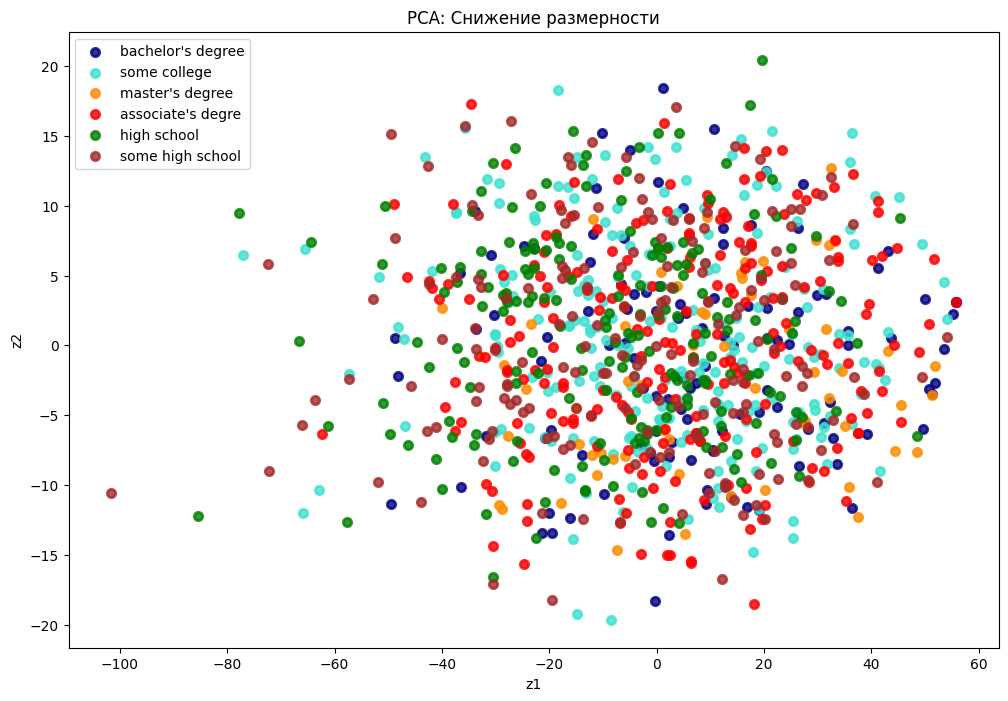

In [ ]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
colors = ["navy", "turquoise", "darkorange", "red", "green", "brown"]
lw = 2

categories = ["bachelor's degree", 'some college', "master's degree", "associate's degre", 'high school', 'some high school']

for color, i, target_name in zip(colors, range(6), categories):
    plt.scatter(X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("PCA: Снижение размерности")
plt.show()


Точки смешиваются, можно сделать вывод, что:
1) Образование не является сильным фактором для разделения данных:

• PCA, как метод снижения размерности, пытается найти главные компоненты, которые объясняют наибольшую дисперсию в данных.
• Если точки смешиваются, это может означать, что образование не является ключевым фактором, влияющим на дисперсию данных.
• Другие факторы, которые не учтены в этой визуализации, могут быть более важными для разделения данных.

2) PCA не идеально подходит для этого набора данных:

• PCA может не всегда быть оптимальным методом для снижения размерности, особенно если данные имеют сложные взаимосвязи, нелинейные зависимости или сильную корреляцию между переменными.
• Возможно, другие методы снижения размерности, такие как t-SNE или UMAP, могут лучше выявить структуру данных и различия между категориями образования.

3) Категории образования могут быть слишком широкими:

• Если категории образования слишком широкие (например, "бакалавр" и "магистр"), они могут скрывать более тонкие различия.
• Деление на более узкие категории (например, "бакалавр по экономике", "магистр по информатике") может привести к более четкому разделению точек на графике.

4) Недостаточно данных:

• Слишком малое количество данных может привести к тому, что PCA не сможет найти четкие связи между образованием и структурой данных.
• Более обширный набор данных может дать более ясную картину распределения точек.

В целом, смешение точек на графике PCA не означает, что образование не играет роли в структуре данных. Это скорее говорит о том, что PCA не является идеальным инструментом для выделения этой связи в данном наборе данных.


Очень полезной функцией для оценки того, насколько каждый главный компонент сохраняет информацию о дисперсии наших данных, является функция explained_variance_ratio.



In [ ]:
pca.explained_variance_ratio_

array([0.90249276, 0.07982162])

Как вы можете видеть выше, первые главные компоненты сохраняют 90% дисперсии набора данных, тогда как вторые главные компоненты сохраняют только 8% дисперсии. Это указывает на то, что мы, скорее всего, получим хороший результат, если еще больше уменьшим размерность до 1D.



### Независисый анализ компонентов (Independent Component Analysis, ICA)


In [ ]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

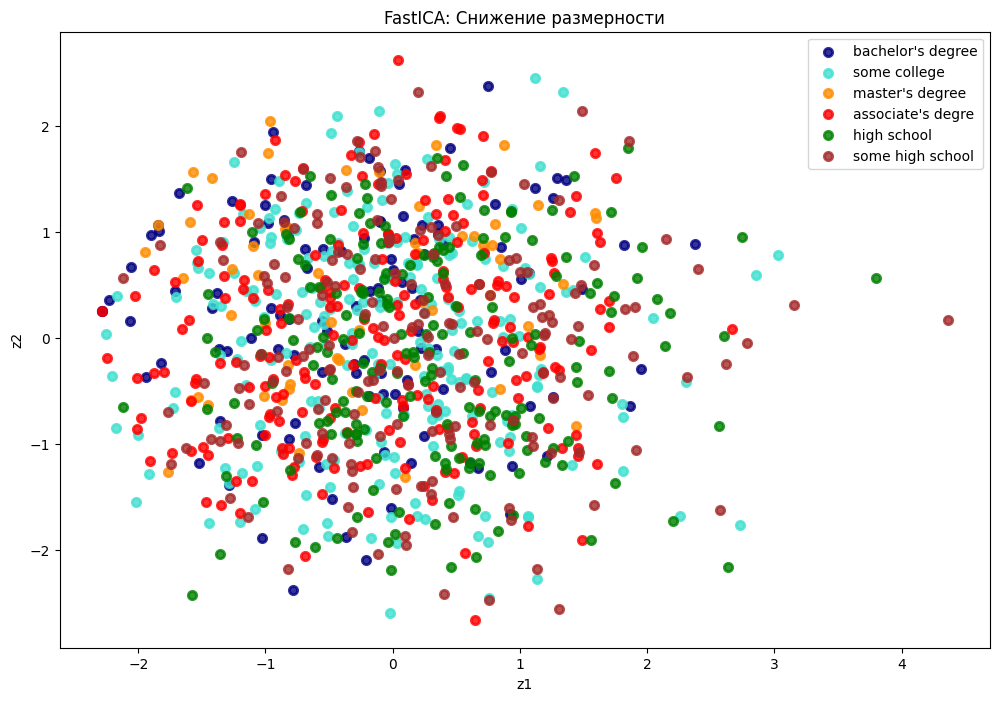

In [ ]:
plt.figure(figsize=(12, 8))
for color, i, target_name in zip(colors, range(6), categories):
    plt.scatter(X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("FastICA: Снижение размерности")
plt.show()

Произошло опять перемешивание: Как и в случае с PCA, если точки перемешались, это может означать, что образование не является ключевым фактором, влияющим на вариацию данных. Если данные имеют сложные нелинейные взаимосвязи, FastICA может не справиться с их разделением. Перемешивание точек не обязательно означает, что образование не играет роли в структуре данных. Это скорее указывает на то, что FastICA может не быть идеальным инструментом для выделения этой связи в данном наборе данных.


#Нелинейные методы уменьшения размерности



### Kernel PCA


In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

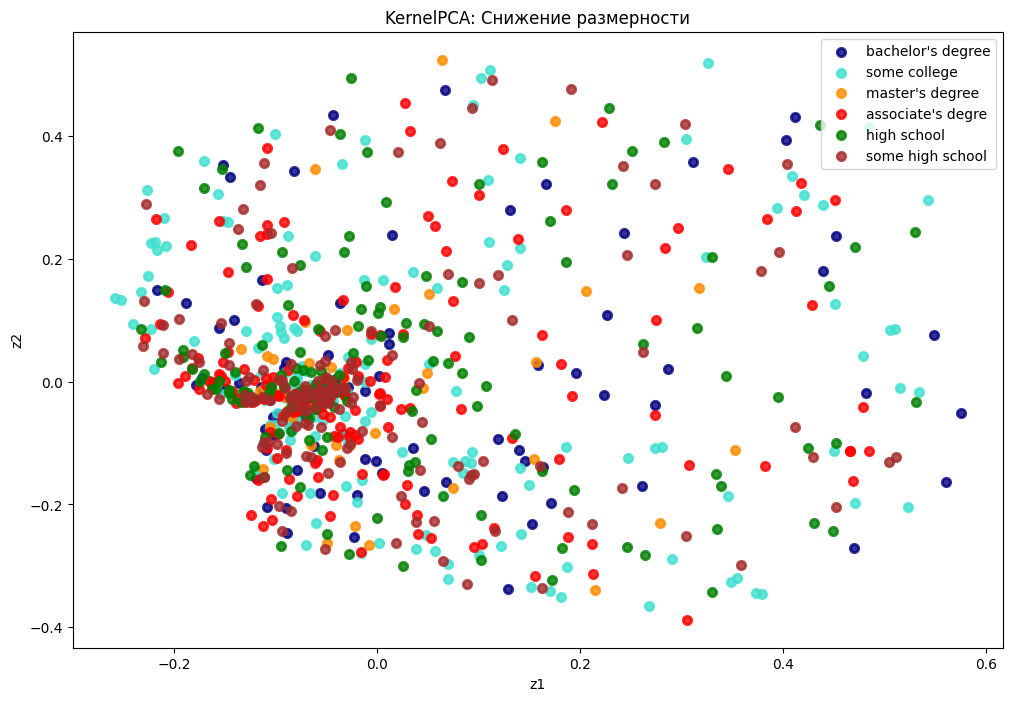

In [ ]:
plt.figure(figsize=(12, 8))
for color, i, target_name in zip(colors, range(6), categories):
    plt.scatter(X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("KernelPCA: Снижение размерности")
plt.show()

Можно заметить, что специалитет более-менее собрался в группу.  KernelPCA может быть более эффективным, чем PCA, для данных с нелинейными зависимостями.


### tSNE



#### Использование в Python

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [ ]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (1000, 5)
New Shape of X:  (1000, 2)
Kullback-Leibler divergence after optimization:  0.5977452397346497
No. of iterations:  999


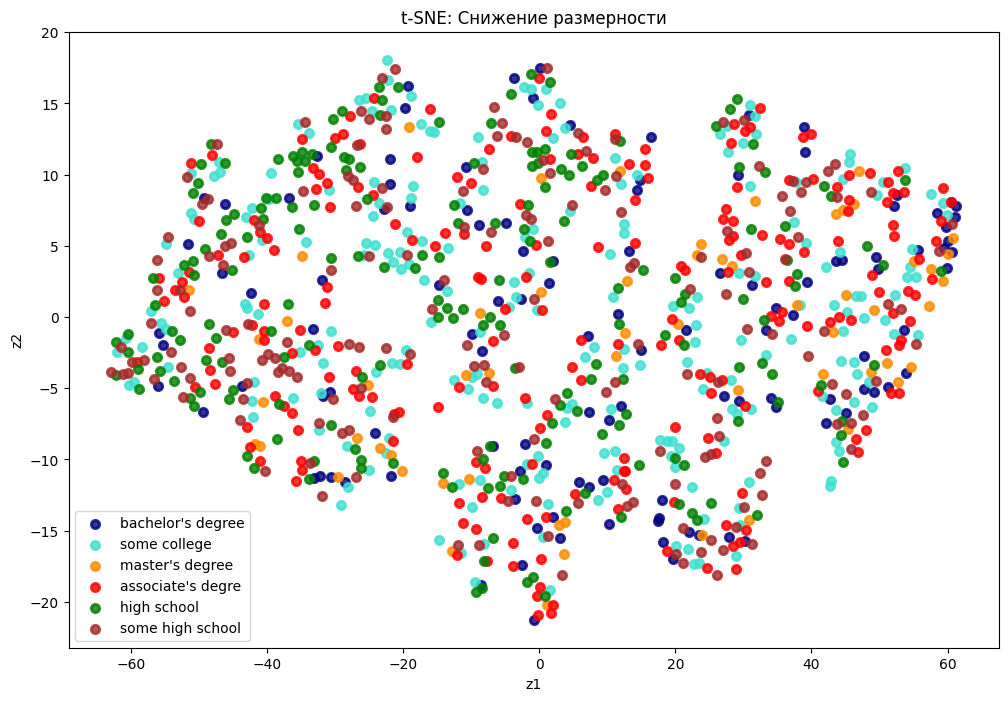

In [ ]:
plt.figure(figsize=(12, 8))
for color, i, target_name in zip(colors, range(6), categories):
    plt.scatter(X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("t-SNE: Снижение размерности")
plt.show()


t-SNE - это нелинейный метод снижения размерности, который предназначен для сохранения локальных структур данных.
t-SNE пытается сохранить близость точек в высокомерном пространстве в низкомерном пространстве.

# Поиск выбросов. DBSCAN

## DBSCAN для кластеризации

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [ ]:
dbscan_cluster1 = DBSCAN(eps = 4, min_samples = 4)
X_new = dbscan_cluster1.fit(X)

In [ ]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 7
Estimated no. of noise points: 124
v_measure = 0.02408220134318151


In [ ]:
df.columns


Index(['race/ethnicity', 'test preparation course', 'math score',
       'reading score', 'writing score'],
      dtype='object')

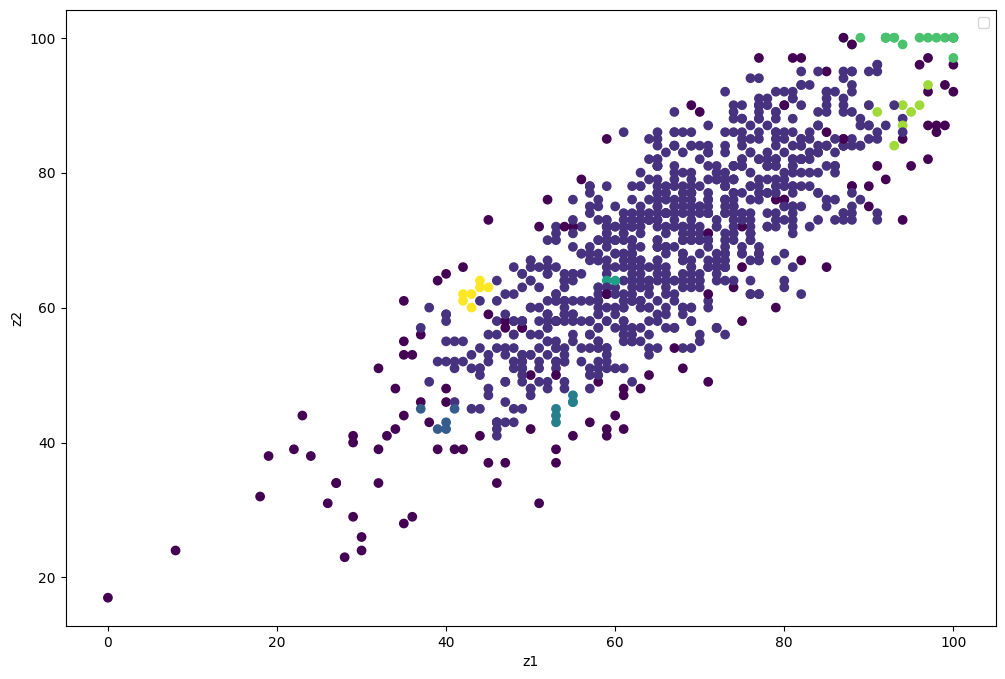

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2


plt.scatter(X['math score'], X['reading score'], c=dbscan_cluster1.labels_)

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

In [ ]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors=min_samples, metric='l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [ ]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

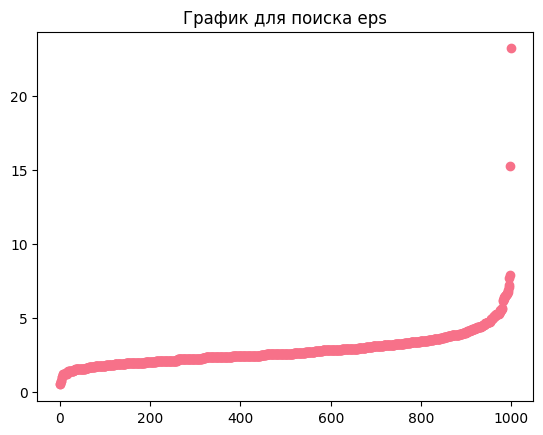

In [ ]:
plt.scatter(x=range(len(dists_ar)), y=dists_ar)
plt.title("График для поиска eps")
plt.show()

eps  выбирают в точке изгиба графика

## DBSCAN для определения выбросов

In [ ]:
dbscan = DBSCAN(eps = 5, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=5, min_samples=3)


In [ ]:
pred = dbscan.fit_predict(X)

In [ ]:
# Анализ результатов DBSCAN
labels = dbscan.labels_
N_clus = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated no. of clusters:', N_clus)

# Identify Noise (шум)
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points:', n_noise)

# Calculating v_measure (качество кластеризации)
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 5
Estimated no. of noise points: 34
v_measure = 0.021700486507748966


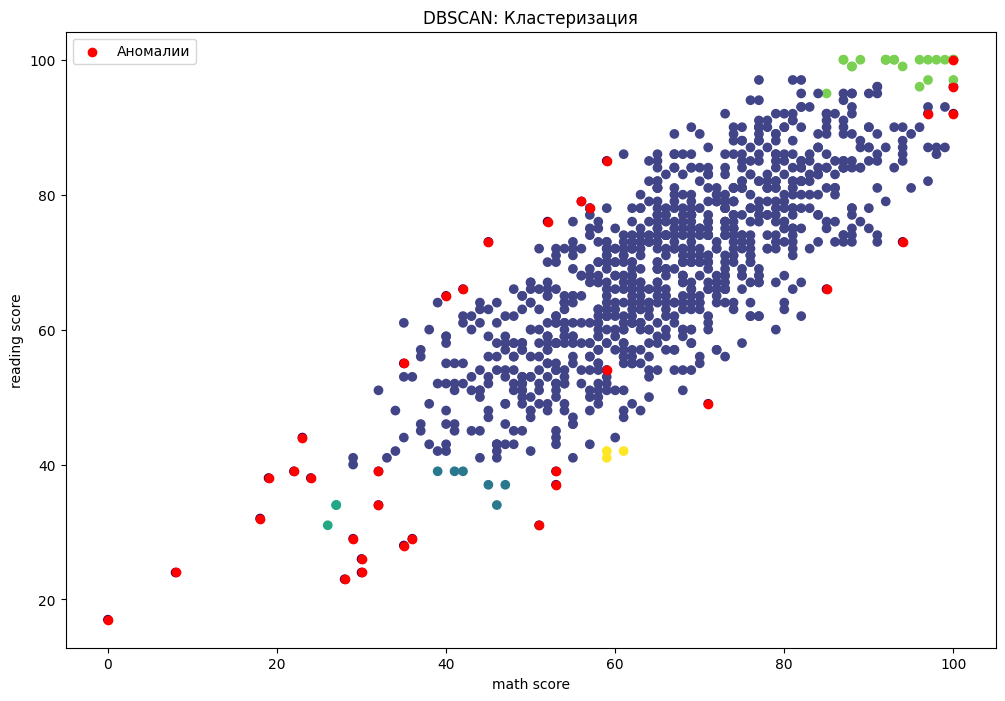

In [ ]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

# Визуализация кластеров и шумовых точек
plt.figure(figsize=(12, 8))
plt.scatter(X['math score'], X['reading score'], c=dbscan.labels_)
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.iloc[anom_index]
plt.scatter(values['math score'], values['reading score'], color='r', label='Аномалии')
plt.xlabel("math score")
plt.ylabel("reading score")
plt.title("DBSCAN: Кластеризация")
plt.legend()
plt.show()

# Задание

1. Изучить теорию
1. Реализовать рассмотренные методы на своем датасете (признаков должно быть более 5)
1. Визуализировать результаты